Partners: Rishi Shah(rrs244) + Ethan Huang(ejh249)

Our project's dataset was https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/, a diabetes health indicators dataset from Kaggle. 

The data originated from the CDC's 2015 BRFSS, or Behavioral Risk Factor Surveillance System, an annual telephone survey collecting data from over 400,000 Americans with regards to diabetes status, other health conditions, and general lifestyle habits. As the below screenshot of part of the dataset shows, the column "Diabetes_012" contains the diabetes status, where 0 is non-diabetic, 1 is pre-diabetic, and 2 is diabetic. Other columns consist of various binary or continuous points of interest -- like fruits/veggies (0 represents the survey participant doesn't eat them regularly, while 1 represents they do), BMI (continuous spectrum from 0 onwards), etc. 


The data came mostly pre-processed, with neatly-organized columns and no outliers/blank cells. There are >250,000 rows.

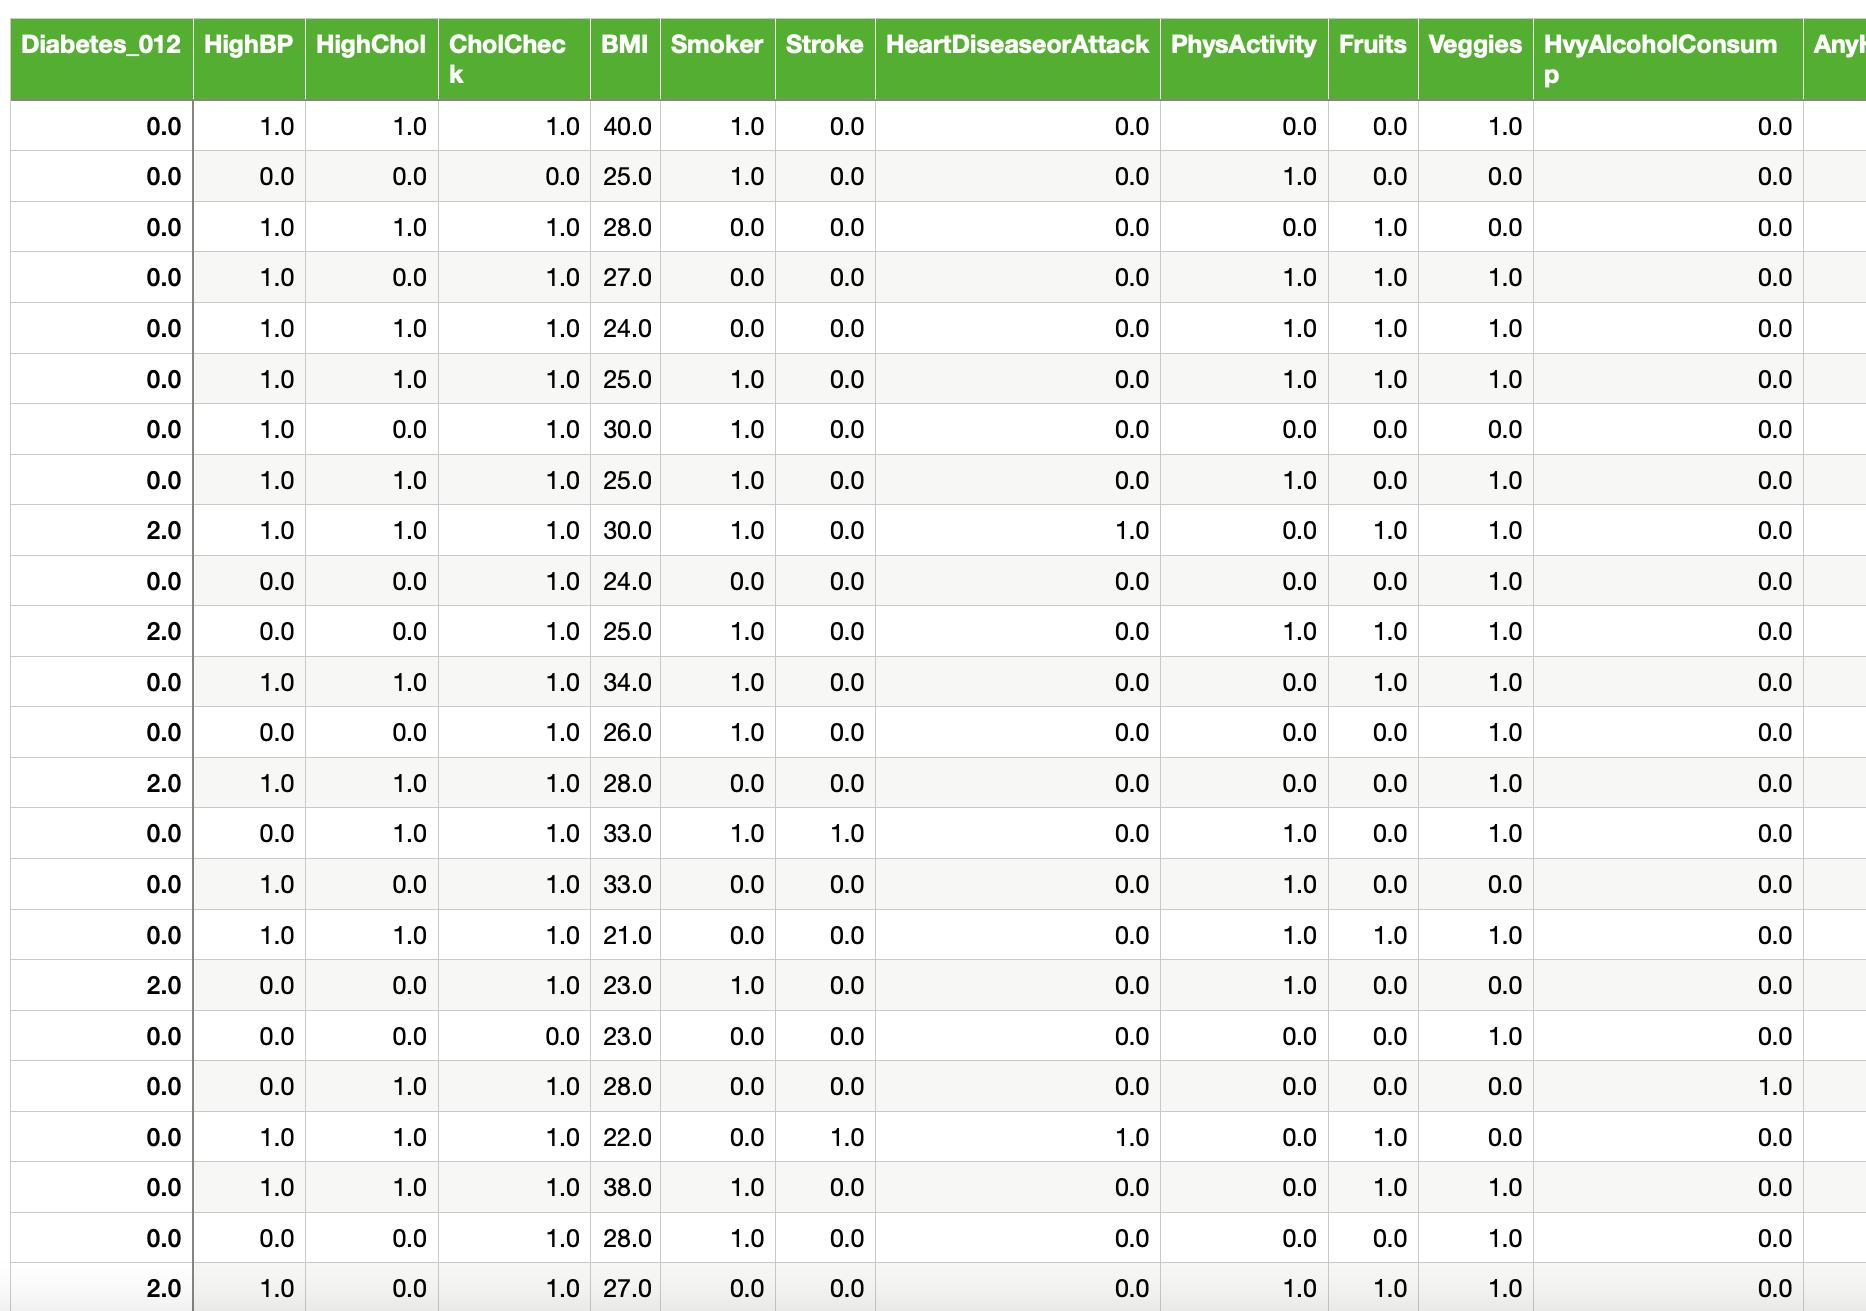

Looking at our dataset, we came up with the question: **What risk factor(s) is most significantly correlated to diabetes status? We hypothesized that because obesity is commonly associated with diabetes, BMI would be the greatest linked risk factor.** 

To determine which risk factor is most significantly correlated with diabetes status, we started with a ***logistic regression***

First, we imported the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

I read my CSV file into a dataframe called df, note this is the same as the above one where Diabetes_012 has 0 for no-diabetes, 1 for pre-diabetes, and 2 for diabetes.


Logistic Regression requires a binary, so I had to do a bit of pre-processing with this data to convert it to where 0 or 1 represented no diabetes (since technically, if you are pre-diabetic, you still don't have diabetes) and 2 represented diabetes as before.



In [2]:
df = pd.read_csv("/Users/rishishah/Downloads/archive/diabetes_012_health_indicators_BRFSS2015.csv")
print(df) 

        Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...              ...     ...       ...        ...   ...     ...     ...   
253675           0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676           2.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677           0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678           0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679           2.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                        

In [3]:
new_df = df.copy()
new_df.loc[new_df['Diabetes_012'] == 1, 'Diabetes_01'] = 0 #only change if pre-diabetes to no diabetes (for binary)
new_df.loc[new_df['Diabetes_012'] == 2, 'Diabetes_01'] = 2 #keep same if diabetes
new_df.loc[new_df['Diabetes_012'] == 0, 'Diabetes_01'] = 0 #keep same if no diabetes


print(new_df['Diabetes_012'].tail(50))
print(new_df['Diabetes_01'].tail(50)) #code works from inspection (e.g., element 253,664)

253630    2.0
253631    0.0
253632    0.0
253633    0.0
253634    0.0
253635    0.0
253636    2.0
253637    0.0
253638    0.0
253639    0.0
253640    0.0
253641    0.0
253642    0.0
253643    0.0
253644    0.0
253645    0.0
253646    0.0
253647    0.0
253648    0.0
253649    0.0
253650    0.0
253651    0.0
253652    2.0
253653    0.0
253654    0.0
253655    0.0
253656    0.0
253657    0.0
253658    0.0
253659    2.0
253660    0.0
253661    0.0
253662    0.0
253663    0.0
253664    1.0
253665    0.0
253666    1.0
253667    0.0
253668    2.0
253669    0.0
253670    2.0
253671    0.0
253672    0.0
253673    0.0
253674    0.0
253675    0.0
253676    2.0
253677    0.0
253678    0.0
253679    2.0
Name: Diabetes_012, dtype: float64
253630    2.0
253631    0.0
253632    0.0
253633    0.0
253634    0.0
253635    0.0
253636    2.0
253637    0.0
253638    0.0
253639    0.0
253640    0.0
253641    0.0
253642    0.0
253643    0.0
253644    0.0
253645    0.0
253646    0.0
253647    0.0
253648    0.0

In [4]:
new_df = new_df.drop("Diabetes_012", axis='columns') #Diabetes_01 is the new column we want to predict
print(new_df) #works as expected

        HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0          1.0       1.0        1.0  40.0     1.0     0.0   
1          0.0       0.0        0.0  25.0     1.0     0.0   
2          1.0       1.0        1.0  28.0     0.0     0.0   
3          1.0       0.0        1.0  27.0     0.0     0.0   
4          1.0       1.0        1.0  24.0     0.0     0.0   
...        ...       ...        ...   ...     ...     ...   
253675     1.0       1.0        1.0  45.0     0.0     0.0   
253676     1.0       1.0        1.0  18.0     0.0     0.0   
253677     0.0       0.0        1.0  28.0     0.0     0.0   
253678     1.0       0.0        1.0  23.0     0.0     0.0   
253679     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                        0.0           0.0     0.0      1.0  ...          0.0   
1                        0.0           1.0     0.0      0.0  ...          1.0   
2                       

Around this point, I realized a major problem with logistic regression in this case. There are way more non-diabetics than diabetics in America  -- I used the below for loop to quantify this to around 6.18 times as many non-diabetics (0 value) as diabetics (1 value). As such, a model could just guess non-diabetic (0) for all cases and still have around 86% accuracy.

In [5]:
Counter0 = 0
Counter1 = 0
for i in new_df['Diabetes_01']:
    if (i == 0):
        Counter0+=1
    else:
        Counter1+=1
print("Non Diabetics", Counter0) 
print("Diabetics", Counter1) 
ratio = Counter0/Counter1
print("Ratio", ratio)
print("Percentage Accuracy", ratio/(ratio+1) * 100)

Non Diabetics 218334
Diabetics 35346
Ratio 6.177049736886777
Percentage Accuracy 86.06669820245979


Nonetheless, I decided to make the logistic regression model across all variables and run it 10 times to calculate the average of each feature's weight (found through the model's coefficients) as well as the average testing accuracy.

In [9]:
X = new_df.drop("Diabetes_01", axis='columns') #dataframe of features (don't want Diabetes_01 itself)
Y = new_df['Diabetes_01']


# Scale features to deal with no.of iterations limit error (each feature is spread-out differently -- some are binary, while other are continuous over a broad range)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# this yields an array
X = pd.DataFrame(X_scaled, columns=X.columns) #convert back to dataframe


accuracyVal = 0

tot_coeffs = np.zeros(len(X.columns)) #populates array with zeros, equal in length to number of columns in feature dataframe

#Take average of bunch of trials to get average results
for i in range (0,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    #Create model
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracyVal += accuracy_score(Y_test,Y_pred)
    
    coefficients = model.coef_[0] #array of each coefficient's weight
    tot_coeffs += coefficients

tot_coeffs = tot_coeffs/10 #divide coefficients over 10 iterations
accuracyVal = accuracyVal/10 #divide accuracy score over 10 iterations
feature_weights = pd.DataFrame({'Feature': X.columns, 'Coefficient': tot_coeffs}) #make dataframe associating each feature with its weight
sorted_feature_weights = feature_weights.sort_values(by='Coefficient', ascending=False) #put it in descending order

In [12]:
print("Feature Weights:")
print(sorted_feature_weights)

print("Accuracy Score of Logistic Regression:", accuracyVal)

Feature Weights:
                 Feature  Coefficient
13               GenHlth     0.573023
3                    BMI     0.403243
18                   Age     0.377459
0                 HighBP     0.375065
1               HighChol     0.285650
2              CholCheck     0.237697
17                   Sex     0.128646
6   HeartDiseaseorAttack     0.064961
16              DiffWalk     0.047319
5                 Stroke     0.025952
11         AnyHealthcare     0.016108
12           NoDocbcCost     0.003722
4                 Smoker    -0.003952
9                Veggies    -0.014791
8                 Fruits    -0.021651
7           PhysActivity    -0.022332
14              MentHlth    -0.027081
19             Education    -0.028785
15              PhysHlth    -0.065813
20                Income    -0.106989
10     HvyAlcoholConsump    -0.177983
Accuracy Score of Logistic Regression: 0.8626399400819931


First, I'll note that the logistic regression's accuracy was 86.2%, disappointingly little above the 86.06% accuracy of the "bare-minimum" strategy from before. As such, I'll try a few more models after considering this.

As for the feature weights, a general summary is that the sign and magnitude are of greatest significant, the former indicating whether an increase in the feature (e.g., a BMI value increase or a "true" Veggies result) corresponds with the increased likelihood of a positive Diabetes diagnosis. For example, given the same value for all remaining features, a positive feature weight would mean that a higher BMI value corresponds to the person more likely having Diabetes (with a negative feature weight meaning the reverse). The magnitude indicates the strength of this significance.

Among our features, then, the risk factors that predict Diabetes the best under a logistic regression are GenHlth, BMI, and HighBP. Our worst risk factors are HvyAlcoholConsump, Income, and PhysHlth. I'll depict it a bit better by using a bar graph below.

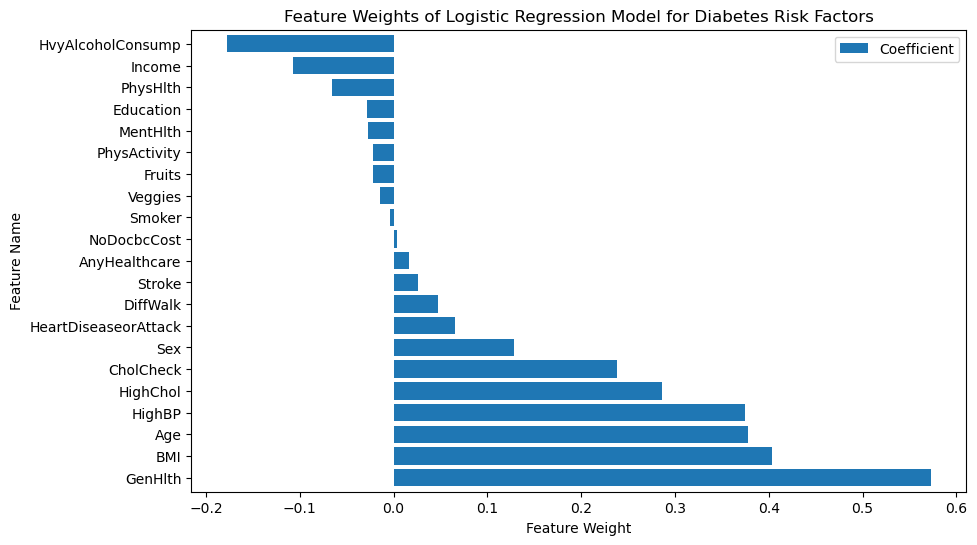

In [13]:
fig0, ax0 = plt.subplots(figsize=(10, 6))
sorted_feature_weights.plot(kind='barh', ax=ax0, width=0.8)

# Set plot labels and title
ax0.set_xlabel('Feature Weight')
ax0.set_ylabel('Feature Name')
ax0.set_title('Feature Weights of Logistic Regression Model for Diabetes Risk Factors')

#Solution to ticks showing up as numbers corresponding with features rather than the names themselves
ax0.set_yticklabels(sorted_feature_weights['Feature'])

plt.show()





Next, I'll try using a Decision tree to determine the best risk factors for predicting Diabetes status, using K-Folds for cross validation. First, I import the necessary packages. Then, since I don't need to worry about a binary like in logistic regression, I just use the diabetes dataset with 0, 1, and 2 as the possibilities. 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

df = pd.read_csv("/Users/rishishah/Downloads/archive/diabetes_012_health_indicators_BRFSS2015.csv")

X = df.drop("Diabetes_012", axis='columns')  # Features
Y = df['Diabetes_012']  # Target 

In a decision tree, one must consider the ideal depth of the tree (i.e., the number of nodes/leaves that should be considered for best predicting the target variable) for maximum accuracy. I'll do that first, initially just using a normal 80/20 train/test split and find + store the best depth.

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1998)

best_depth = 1  # Keep track of depth that produces tree with highest accuracy
best_accuracy = 0  # The best accuracy from a given tree
for k in range(1, 60): 
    #Create and fit a model of depth k --> want to find best depth so iterate over 1 to 59 (note this creates a large runtime)
    model = tree.DecisionTreeClassifier(max_depth=k)

    model.fit(X_train, Y_train)

    # TODO store the predictions for the test set
    pred_test = model.predict(X_test)

    # Find the accuracy of the model's predictions (pred_test)
    # compared to the actual samples, and score the accuracy in acc_test.
    acc_test = accuracy_score(Y_test, pred_test)

    # Compare the accuracy found with the best current depth/accuracy found and update if necessary

    if best_accuracy < acc_test:
        best_accuracy = acc_test
        best_depth = k

print(best_accuracy)
print(best_depth) 

0.8487464522232734
5


Next, for better testing the model's ability to predict new data, we can use K-Fold cross validation, with our default value of 5 folds. Doing this will allow us to find an average accuracy across multiple runs/folds at our above best depth of 5 rather than the sole best accuracy calculation above. 

In [17]:
kf = KFold(n_splits = 5) # number of folds -- default value
totAccuracy = 0

# Optimal model creation
model = tree.DecisionTreeClassifier(max_depth=best_depth)  # using the best_depth from previous part
# store model outside for space storage within cross-validation, as well as for feature importance below



for train_index, test_index in kf.split(X): # within incX, we split into our train and test data based on our desired folds
    # TODO: define X_train, X_test, Y_train, Y_test
    X_train = X.iloc[train_index]
    Y_train = Y.iloc[train_index] # want same corresponding training indices
    X_test = X.iloc[test_index]
    Y_test = Y.iloc[test_index] # same for testing

    #Fit model
    model.fit(X_train, Y_train)

    # Yield Accuracy score, add to totAccuracy (sum of all folds' accuracy)
    accuracyEach = accuracy_score(Y_test, model.predict(X_test))
    totAccuracy += accuracyEach
avgAccuracy = totAccuracy / 5 # average accuracy across all folds
print('Decision Tree Accuracy:', avgAccuracy)

Decision Tree Accuracy: 0.8475126143172501


The printed value, i.e., 0.8475126143172501, represents our average accuracy across all 5 folds of the data. All this gave us, however, was the accuracy of the model -- less than our logistic regression or 86.06% benchmark. How can we consider the importance of each feature in our depth of 5? 

In [18]:
# Get feature importances for the same model from above
feature_importances = model.feature_importances_

# Map feature names to their importance scores
feature_importance_dict = dict(zip(X.columns, feature_importances))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features) # yields weights of each feature, summing to 1

[('HighBP', 0.42411837240442246), ('GenHlth', 0.3136092231160815), ('BMI', 0.12904891753788353), ('HighChol', 0.09103279391261687), ('Age', 0.03963281097211982), ('DiffWalk', 0.0025578820568756917), ('CholCheck', 0.0), ('Smoker', 0.0), ('Stroke', 0.0), ('HeartDiseaseorAttack', 0.0), ('PhysActivity', 0.0), ('Fruits', 0.0), ('Veggies', 0.0), ('HvyAlcoholConsump', 0.0), ('AnyHealthcare', 0.0), ('NoDocbcCost', 0.0), ('MentHlth', 0.0), ('PhysHlth', 0.0), ('Sex', 0.0), ('Education', 0.0), ('Income', 0.0)]


How can we display this data in graphical form? Another bar-graph seems appropriate, given we have a number of different classes (in terms of each feature) and their relative weights. 

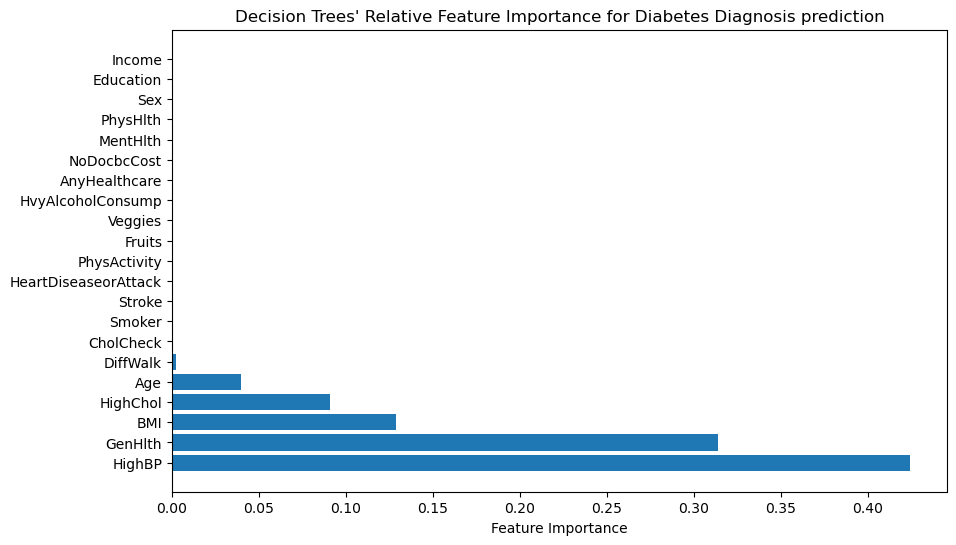

In [19]:
#For visualization's sake, we can now unzip the sorted dictionary into each feature's name and importance
feature_names, importances = zip(*sorted_features)

# Plotting each feature by importance in a bar-graph
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances, align='center') #plot each bar -- each feature's names with corresponding importance
plt.yticks(range(len(feature_names)), feature_names) #names each bar with feature's name
plt.xlabel('Feature Importance')
plt.title("Decision Trees' Relative Feature Importance for Diabetes Diagnosis prediction")
plt.show()

In conclusion, our bar graph of feature importances show the most crucial features for the decision tree's diabetes risk factor predictions were HighBP, GenHlth, and BMI, while the vast majority of risk factors did not play an integral role in prediction. As the loop earlier demonstrated, running the model for each depth from 1 to 60, only a depth of 5 is optimal. 

Again, however, our accuracy score was below our 86.06% benchmark -- we try using a linear SVM, in order to find the optimal hyperplane boundary for classification. Linear SVM is unique, in that we can find "coefficient weights" for each class (i.e., for the no-diabetes group, pre-diabetes group, and yes-diabetes group) rather than a general one like above. As such, there will be 3 separate bar graphs below. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn import svm



df = pd.read_csv("/Users/rishishah/Downloads/archive/diabetes_012_health_indicators_BRFSS2015.csv")
X = df.drop("Diabetes_012", axis='columns')  # Features
Y = df['Diabetes_012']  # Target variable -- note we will be using multiclass SVM to account for all 3 classes (0, 1, or 2 value)



After these linear kernel trials, I also attempted radial kernels -- the model didn't seem to run, and using print statements to check where the code was stopping revealed it was with the model itself. Apparently, radial kernel has a significant big O-notation, between O(n^2) and O(n^3), where n is the number of samples -- in our case >250,000. As such, it was inconceivable to run the whole thing on my computer, so we stuck with simply the linear kernel. 

As you see below, even the linear runtime was too extreme, and the model was not fully run after several minutes. As such, we took a random sample of 100,000 samples from the datapoint

In [2]:
#We first scale data, to better interpret coef_ values from linear kernel
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# this yields an array
X = pd.DataFrame(X_scaled, columns=X.columns) #convert back to dataframe


#Massive 250,000 values in dataset -- very slow runtime. Take first 100,000 for application (reinitialize x and y-values, although note x and y now represent respective subsets)

#Linear SVM

X = X.sample(n=100000, random_state=42)
Y = Y.sample(n=100000, random_state=42)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1998)

linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train, Y_train)
Y_pred_linear = linear_svc.predict(X_test)
print('Accuracy Score of Linear Kernel: ', accuracy_score(Y_test, Y_pred_linear))

Accuracy Score of Linear Kernel:  0.8392


The accuracy of the linear kernel above, or 0.8392, was our least ML model accuracy yet. Again, this was on a subset of the X and Y data, so it's unclear what the full dataset's value would be, but likely somewhere in this ballpark. Next, I want to visualize how important each of the features were, and since this is multi-class, as described before, I will have visualizations for all 3 possible classes (0, 1, and 2). 

Text(0.5, 1.0, 'Coefficients of Linear SVM Model for 0-class (no diabetes)')

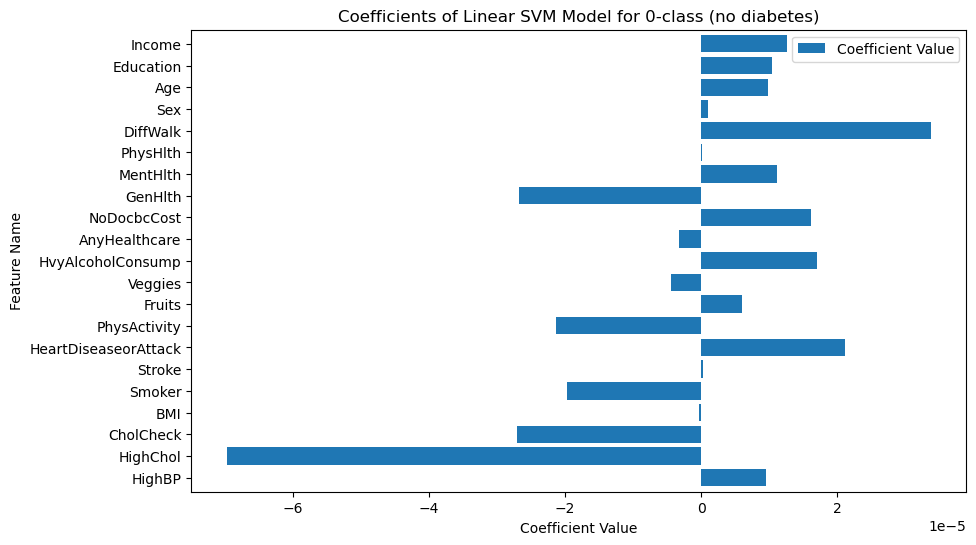

In [5]:

#For first possible class (class_label =0 ) -> i.e. coefficient weights for no diabetes group
class_label = 0
class_coeffs0 = linear_svc.coef_[class_label]

# Create a DataFrame with feature names and corresponding coefficients (importances of each feature variable in classification by hyperplane0
coefficients_df0 = pd.DataFrame(class_coeffs0, index=X.columns, columns=['Coefficient Value'])

# Plot a segmented bar graph
fig0, ax0 = plt.subplots(figsize=(10, 6))
coefficients_df0.plot(kind='barh', ax=ax0, width=0.8)

# Set plot labels and title
ax0.set_xlabel('Coefficient Value')
ax0.set_ylabel('Feature Name')
ax0.set_title('Coefficients of Linear SVM Model for 0-class (no diabetes)')




The most important risk factors (in terms of magnitude, not sign) were DiffWalk, GenHlth, and HighChol. The least important risk factos were BMI, Stroke, and PhysHlth.

In [ ]:


#For second possible class (class_label = 1) -> i.e. coefficient weights for pre-diabetes group

class_label = 1
class_coeffs1 = linear_svc.coef_[class_label]

# Create a DataFrame with feature names and corresponding coefficients (importances of each feature variable in classification by hyperplane0
coefficients_df1 = pd.DataFrame(class_coeffs1, index=X.columns, columns=['Coefficient Value'])

# Plot a segmented bar graph
fig1, ax1 = plt.subplots(figsize=(10, 6))
coefficients_df1.plot(kind='barh', ax=ax1, width=0.8)

# Set plot labels and title
ax1.set_xlabel('Coefficient Value')
ax1.set_ylabel('Feature Name')
ax1.set_title('Coefficients of Linear SVM Model for 1-class (pre diabetes)')

Text(0.5, 1.0, 'Coefficients of Linear SVM Model for 1-class (pre diabetes)')

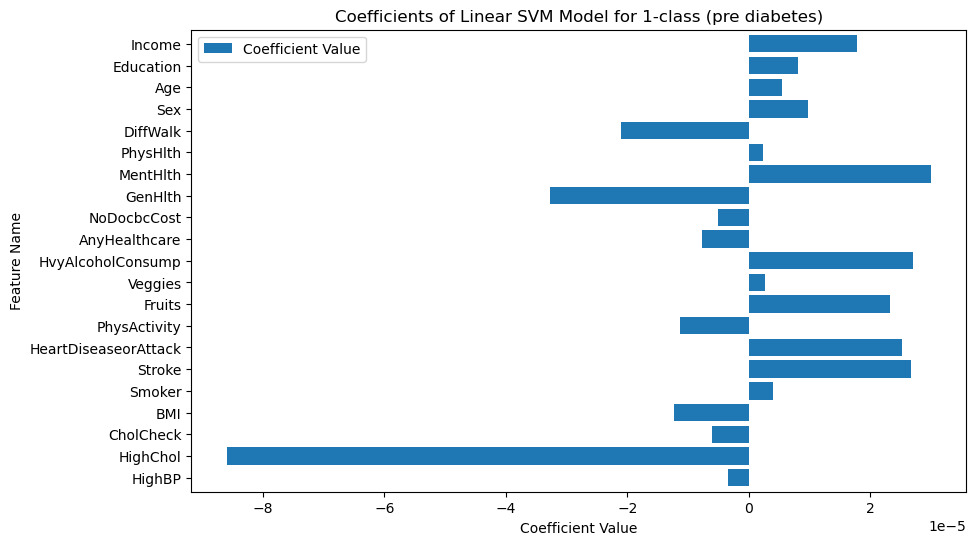

In [4]:
#For second possible class (class_label = 1) -> i.e. coefficient weights for pre-diabetes group

class_label = 1
class_coeffs1 = linear_svc.coef_[class_label]

# Create a DataFrame with feature names and corresponding coefficients (importances of each feature variable in classification by hyperplane0
coefficients_df1 = pd.DataFrame(class_coeffs1, index=X.columns, columns=['Coefficient Value'])

# Plot a segmented bar graph
fig1, ax1 = plt.subplots(figsize=(10, 6))
coefficients_df1.plot(kind='barh', ax=ax1, width=0.8)

# Set plot labels and title
ax1.set_xlabel('Coefficient Value')
ax1.set_ylabel('Feature Name')
ax1.set_title('Coefficients of Linear SVM Model for 1-class (pre diabetes)')

The most important risk factors (again in terms of magnitude) were HighChol, MentHlth, and GenHlth. The least important risk factors were PhysHlth, Veggies, and HighBP.

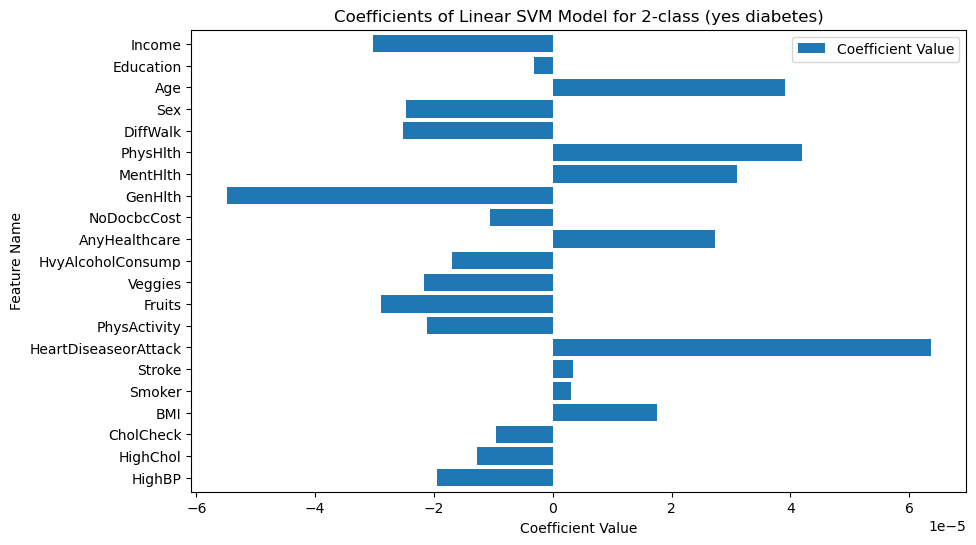

In [6]:
#For third possible class (class_label = 2) -> i.e. coefficient weights for  diabetes group

class_label = 2
class_coeffs2 = linear_svc.coef_[class_label]

# Create a DataFrame with feature names and corresponding coefficients (importances of each feature variable in classification by hyperplane0
coefficients_df2 = pd.DataFrame(class_coeffs2, index=X.columns, columns=['Coefficient Value'])

# Plot a segmented bar graph
fig2, ax2 = plt.subplots(figsize=(10, 6))
coefficients_df2.plot(kind='barh', ax=ax2, width=0.8)

# Set plot labels and title
ax2.set_xlabel('Coefficient Value')
ax2.set_ylabel('Feature Name')
ax2.set_title('Coefficients of Linear SVM Model for 2-class (yes diabetes)')

# Show all 3 plots
plt.show()


The most important risk factors (again in terms of magnitude) were HeartDiseaseorAttack, GenHlth, and PhysHlth. The least important risk factors were Education,Stroke,Smoker.

We then looked back to our decision tree, which had an accuracy score of about 84.8%. We wondered how that value would change if we attempted to balance the dataset. As mentioned before, there are about 6.18 times as many diabetics as non-diabetics (the number of pre-diabetics is even smaller than both groups). As such, we will try to balance the dataset to regularize the number of samples taken from each group. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets

df = pd.read_csv("/Users/rishishah/Downloads/archive/diabetes_012_health_indicators_BRFSS2015.csv")
features = df[["HighBP", "GenHlth", "BMI", "HighChol", "Age", "DiffWalk"]] 
goal = (df["Diabetes_012"] == 2) #We effectively set a binary condition -- checking the successes later of wrong or right predictions (lumping 0 & 1 as no diabetes)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from contextlib import suppress


We decided to take aspects of the earlier decision tree model by using the only features with non-zero feature importances: the features in the dataframe above. We also do k-fold cross validation. As described earlier, we find the balanced sample sets by finding the minimum number of samples across classes, and then randomly sampling in the other two classes to only get that number of samples. We then train the model with onlyt hose samples. 

In [6]:
accuracies, positive_predictive_values, negative_predictive_values = [],[],[]
n_folds = 10
kf = KFold(n_folds)
for train_index, test_index in kf.split(features):
    X_train, X_test = features.iloc[train_index], features.iloc[test_index]
    y_train, y_test = goal[train_index], goal[test_index]
         # Count the number of samples in each class
    class_counts = {label: np.sum(y_train == label) for label in set(y_train)}

     # Determine the minimum number of samples
    min_samples = min(class_counts.values())

     # Create balanced sample sets
    balanced_indices = []
    for label in set(y_train):
        label_indices = np.where(y_train == label)[0]
        sampled_indices = np.random.choice(label_indices, min_samples, replace=False)
        balanced_indices.extend(sampled_indices)

     # Use the balanced indices to create a new balanced training set
    X_train_balanced = X_train.iloc[balanced_indices]
    y_train_balanced = y_train.iloc[balanced_indices]
    
    #Make the deicsion tree
    tree = DecisionTreeClassifier()
    #Fit on balanced dataset
    tree.fit(X_train_balanced, y_train_balanced)
    #Draw predictions
    pred = tree.predict(X_test)
    
    #true negative, false positive, false negative, true positive confusion matrix generated
    tn, fp, fn, tp = confusion_matrix(y_test, pred, labels=[False,True]).ravel()
    
    accuracies.append((tn + tp) / len(y_test)) #Find accuracy of each fold-- the amount of true positives and negatives / total number of samples (percentage right)
    if tp + fn > 0: 
        positive_predictive_values.append(tp / (tp + fn)) #a positive predictive value (i.e., percentage of having diabetes when diagnosed with it)
    if tn + fp > 0: 
        negative_predictive_values.append(tn / (tn + fp)) #same with negative predictive value (i.e., percentage of having no diabetes when not diagnosed with it)
    
cv_accuracy = np.mean(accuracies)
cv_positive_predictive_value = np.mean(positive_predictive_values)
cv_negative_predictive_value = np.mean(negative_predictive_values)

After finding the accuracy, positive predictive value, and negative predictive value of each fold, we find their average across all folds.

In [7]:
print("Accuracy:", cv_accuracy)
print("accuracy for positive samples",  cv_positive_predictive_value)
print("accuracy for negative samples", cv_negative_predictive_value)

Accuracy: 0.7145104068117313
accuracy for positive samples 0.7203355765650024
accuracy for negative samples 0.7134933758258144


Note the accuracy is considerably lower, which makes sense since we're getting rid of the model's ability to just pick the no-diabetes choice for each person and get around 86%. Now, it actually has to consider the negative samples -- as you can see, the accuracy for positive and negative samples are very similar, which means that we have accomplished that mission.

Let's try to visualize the spread of non-diabetics and diabetics with our features of interest using a pie chart.

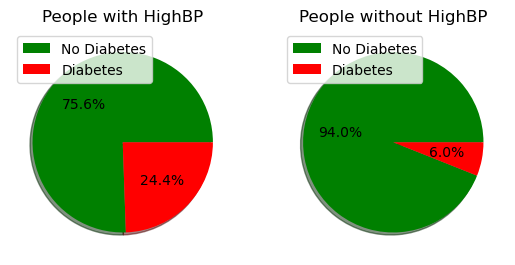

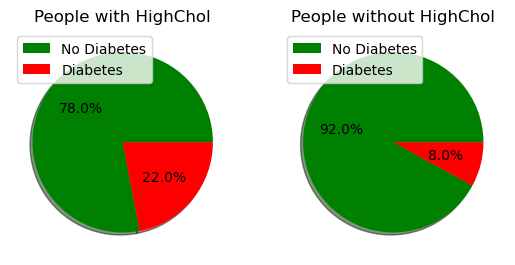

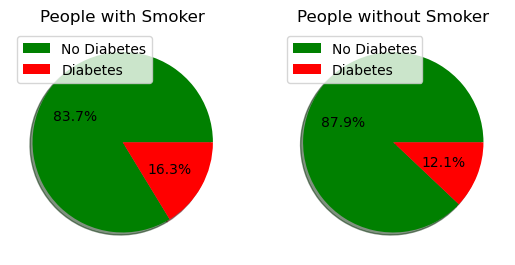

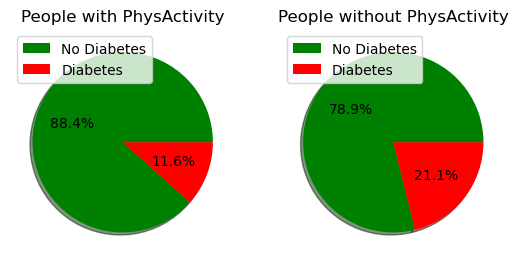

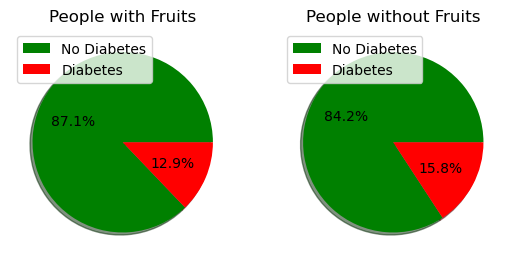

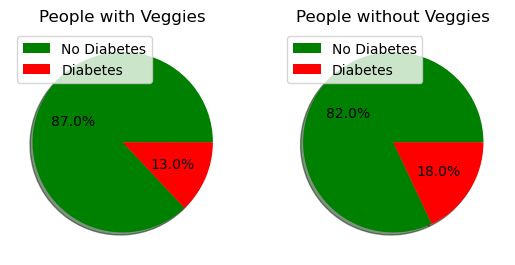

In [10]:
import matplotlib.pyplot as plt

# Create a list of all the features that we want a pie chart for (same list from before)
factors = ["HighBP", "HighChol", "Smoker", "PhysActivity", "Fruits", "Veggies"]

# Iterate through the list
for factor in factors:
    # We find the value counts for when the factor is 1 (i.e., diabetes ) and when the factor is 0 (no diabetes)
    # We replace instances of pre-diabetes as no diabetes to maintain similarity with the models
    with_factor = df[df[factor] == 1]['Diabetes_012'].replace({1: 0}).value_counts() 
    without_factor = df[df[factor] == 0]['Diabetes_012'].replace({1:0}).value_counts()
    
    # Create two subplots that compare the presence of diabetes in people with/without certain health factors (note all these ones are binary, which is useful)
    _, (ax1, ax2) = plt.subplots(1, 2)

    ax1.pie(with_factor,colors = ['g', 'r'], autopct='%1.1f%%', shadow = True)
    ax1.legend(['No Diabetes', 'Diabetes'], loc = 2)
    ax1.set_title('People with ' + factor)

    ax2.pie(without_factor, colors = ['g', 'r'], autopct='%1.1f%%', shadow = True)
    ax2.legend(['No Diabetes', 'Diabetes'], loc = 2)
    ax2.set_title('People without ' + factor)

    plt.show()

Personally, the pie charts are especially interesting to look at, since a lot of the relationships they depict are common sense (e.g., the gorup that doesn't eat veggies has higher diabetes risk than the group that does), but it quantiifes it quite well. It's clear BP, Cholesterol, and PhysActivity are the most important features here.

Finally, we end off with a perceptron model -- also a linear classifier like the SVM, but we seek to minimize misclassifications. Again, we use the 6 feature list that we determined to be the most relevant before for the decision trees. 

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Read the dataset 
df = pd.read_csv("/Users/rishishah/Downloads/archive/diabetes_012_health_indicators_BRFSS2015.csv")


# Chosen features with higher importance as seen in Decision Tree code
features = df[["HighBP", "GenHlth", "BMI", "HighChol", "Age", "DiffWalk"]]

# sets up target to be a binary classification for perceptron
goal = (df["Diabetes_012"] == 2)  # 0 and 1 are False, while 2 is True

In [17]:
# Perceptron

X_train, X_test, y_train, y_test = train_test_split(features, goal, test_size = 0.2, random_state =1998)

model = Perceptron()

# Train the perceptron model
model.fit(X_train, y_train)

# Make predictions on both training and testing sets
pred_train = model.predict(X_train)
pred_test = model.predict(X_test) 

# Compute the train and test accuracy using accuracy_score
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)

# Output the accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.861996412803532
Test Accuracy: 0.8636668243456322


The perceptron, while a relative simple ML model, seems to be one of our best performing machine learning models, with accuracies exceeding 86.06% for both train and test. It is unclear why the test accuracy is outperforming the training accuracy though - perhaps a problem with model complexity or overfitting. So which feature is the best in Perceptron? 

In [28]:
coefficients = model.coef_[0]
feature_names_list = X_train.columns.tolist() # to resolve value-error
print(pd.DataFrame({"Feature": feature_names_list, "Coefficient": coefficients})) #Creating a dataframe with each feature and corresponding weight

    Feature  Coefficient
0    HighBP        253.0
1   GenHlth        192.0
2       BMI         11.0
3  HighChol        204.0
4       Age         40.0
5  DiffWalk         73.0


It seems among our risk factors, HighBP, GenHlth, and HighChol are the most important features for Perceptron.

***In conclusion, across our models:***

Logistic Regression: 

    Accuracy = 0.862

    Best Risk Factors = GenHlth, BMI, and HighBP

    Worst Risk factors = HvyAlcoholConsump, Income, and PhysHlth

Decision Tree: 

    Accuracy = 0.8475126143172501
    
    Best Risk Factors = HighBP, GenHlth, BMI

Perceptron: 
   
    Accuracy = 0.864
    
    Best Risk Factors = HighBP, GenHlth, HighChol

SVM: 
      
    Accuracy = 0.8392
    
    Best Risk Factors for No-Diabetes group = DiffWalk, GenHlth, HighChol. 
    
    Worst Risk Factors for No-Diabetes group = BMI, Stroke, and PhysHlth.
    
    
    Best Risk Factors for Pre-Diabetes group = HighChol, MentHlth, GenHlth.
    
    Worst Risk Factors for Pre-Diabetes group = PhysHlth, Veggies, HighBP.
    
    
    Best Risk Factors for Yes-Diabetes group = HeartDiseaseorAttack, GenHlth, PhysHlth. 
    
    Worst Risk Factors for Pre-Diabetes group = Education, Stroke, Smoker.


Selection Bias: 

    Accuracy = 0.7145104068117313
    
    Most significant risk factors (from pie-chart) = HighBP, Cholesterol, PhysActivity
    
    
**Our best models for accuracy were Perceptron and Logistic Regression. The most significant risk factors across models seem to be HighBP and GenHlth. In other words, the risk factors that appear to be most of concern for diagnosing diabetes are Blood pressure and general health -- this is important for future ML models, preventive measures, and surveys/research.**

Thanks for reading through our project! 

-Rishi Shah, Ethan Huang
 Cornell '27